<a href="https://colab.research.google.com/github/Bertimaz/Data-Science/blob/main/Projeto-02-Retencao-de-Usuarios-em-StartUp/%20An%C3%A1lise_de_Reten%C3%A7%C3%A3o_de_Usu%C3%A1rios_em_Aplicativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O Desafio**


Você é um analista de dados júnior que trabalha para uma startup que oferece software de gestão de despesas na nuvem por meio de uma assinatura mensal. Na ultima reunião de planejamento anual onde são definidas as prioridades para o ano e o orçamento, você ficou responsável por responder se o produto já chegou ao **Product Market Fit**, levando em consideração que o app tem apenas 2 anos, que o orçamento de marketing dobrou nesse período e os dados de obtenção e atividades dos clientes. 

Qual seria a recomendação para os próximos passos: Investir pesado em marketing e **crescer a base de usuários** ou investir em product development e **melhorar o produto**.






# **Skills/Tools:**

    

*   Google Colab
*   Python
*   Pandas
*   Statistics
*   Google Sheets




    
    
    
    


# Importando bibliotecas




In [ ]:
import pandas as pd
import numpy as np
from google.colab import data_table
from google.colab import drive
data_table.enable_dataframe_formatter()
import requests, locale,matplotlib
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import PercentFormatter

drive.mount('/content/gdrive')




Mounted at /content/gdrive


# Entendendo os dados

In [ ]:
#Importandos os dados
user_df=pd.read_csv('/content/gdrive/MyDrive/Análise de Retenção/dataset_retencao_por_mes.csv')
user_df.head()

,Cliente,Estado Cliente,Mes Registro,Mes de Abandono (Churn),1/2019,2/2019,3/2019,4/2019,5/2019,6/2019,...,3/2020,4/2020,5/2020,6/2020,7/2020,8/2020,9/2020,10/2020,11/2020,12/2020
0,George Garcia,Active,1/2019,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,James Johnson,Churned,1/2019,3/2019,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,John Williams,Churned,1/2019,8/2019,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Robert Jones,Active,1/2019,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Michael Brown,Active,1/2019,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


A Tabela contem as informações de cada usuário, o nome, o estado - Active(ativo) ou Churned (inativo) - Mês de registro, e em seguida uma coluna para cada mês indicando com NaN os meses inativos.

Vamos avaliar o número total de usuários adquiridos e o número de usuários ativos mês a mês

# Preparando os dados

Os primeiros passos da análise é preparar o banco de dados e visualisar a obtenção de novos usuários e o número de usuários ativos no periodo.

In [ ]:
#Formatando

#Retirando espaços dos labels
user_df.columns = user_df.columns.str.replace(' ', '') 
#Retirando '(Churn)' do label 'MesdeAbandono(Churn)'
user_df=user_df.rename({'MesdeAbandono(Churn)' : 'MesdeAbandono'},axis=1)
#Transformando datas em  datetime
user_df.MesRegistro=pd.to_datetime(user_df.MesRegistro)
user_df.MesdeAbandono=pd.to_datetime(user_df.MesdeAbandono)


##Número de Usuários Adquiridos

In [ ]:
#Calculando % de usuários adquiridos(usuarios adquiridos no mes/usuários totais)

#Agrupando
count_df=user_df.groupby([user_df.MesRegistro.dt.year,user_df.MesRegistro.dt.month]).Cliente.count().to_frame(name='UsuariosAdquiridosMes')
#Corrigindo nomes de index
count_df.index.names=['Year','Month']
#Calculando numero total de usuários adquiridos
totalUser = user_df.Cliente.count()

#Calculando Número total de usuários acumulado
anterior=0
count_df['UsuariosAdquiridosAcumulado']=np.nan
for index, row in count_df.iterrows():
  count_df.at[index,'UsuariosAdquiridosAcumulado'] = anterior+row['UsuariosAdquiridosMes']
  anterior=count_df.at[index,'UsuariosAdquiridosAcumulado']

#Calculando porcentagem de usuários adquiridos por mês em relação ao total de usuários
count_df['%deUsuariosAdquiridos']=count_df['UsuariosAdquiridosMes']/totalUser*100

#Calculando porcentagem acumulada
anterior=0
count_df['%deUsuariosAdquiridosAcumulado']=np.nan
for index, row in count_df.iterrows():
  count_df.at[index,'%deUsuariosAdquiridosAcumulado'] = anterior+row['%deUsuariosAdquiridos']
  anterior=count_df.at[index,'%deUsuariosAdquiridosAcumulado']
count_df








UsuariosAdquiridosMes  UsuariosAdquiridosAcumulado  \
Year Month                                                       
2019 1                         11                         11.0   
     2                         13                         24.0   
     3                         13                         37.0   
     4                         15                         52.0   
     5                         13                         65.0   
     6                         11                         76.0   
     7                         11                         87.0   
     8                          4                         91.0   
     9                          8                         99.0   
     10                        15                        114.0   
     11                        13                        127.0   
     12                         6                        133.0   
2020 1                         21                        154.0   
     2                         11                        165.0   
     3                         11                        176.0   
     4                         16                        192.0   
     5                         25                        217.0   
     6                         22                        239.0   
     7                         21                        260.0   
     8                         27                        287.0   
     9                          5                        292.0   
     10                        12                        304.0   
     11                        10                        314.0   
     12                        16                        330.0   

            %deUsuariosAdquiridos  %deUsuariosAdquiridosAcumulado  
Year Month                                                         
2019 1                   3.333333                        3.333333  
     2                   3.939394                        7.272727  
     3                   3.939394                       11.212121  
     4                   4.545455                       15.757576  
     5                   3.939394                       19.696970  
     6                   3.333333                       23.030303  
     7                   3.333333                       26.363636  
     8                   1.212121                       27.575758  
     9                   2.424242                       30.000000  
     10                  4.545455                       34.545455  
     11                  3.939394                       38.484848  
     12                  1.818182                       40.303030  
2020 1                   6.363636                       46.666667  
     2                   3.333333                       50.000000  
     3                   3.333333                       53.333333  
     4                   4.848485                       58.181818  
     5                   7.575758                       65.757576  
     6                   6.666667                       72.424242  
     7                   6.363636                       78.787879  
     8                   8.181818                       86.969697  
     9                   1.515152                       88.484848  
     10                  3.636364                       92.121212  
     11                  3.030303                       95.151515  
     12                  4.848485                      100.000000

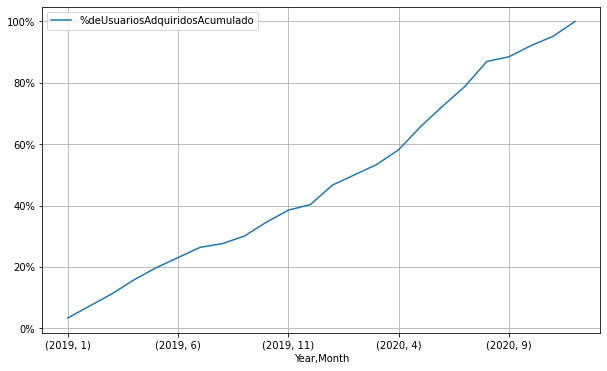

In [ ]:
#Plotando Gráfico
fig, ax = plt.subplots(figsize=(10,6))
ax.yaxis.set_major_formatter(PercentFormatter())
bp = count_df.plot(ax=ax,y='%deUsuariosAdquiridosAcumulado', kind='line', grid=True)





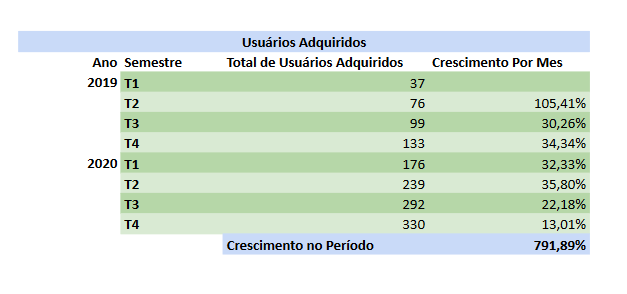

---

Percebemos um fluxo crescente e estável de novos usuários no período de 2 anos, Crescendo de 37 no primeiro trimestre de 2019, para 330 no quarto trimestre de 2020, um crescimento de 791,89%


## Número de Usuários Ativos

In [ ]:
#Calculando % de usuarios ativos por mes(usuarios ativos do mês/Usuarios ativos máximo)

#Calculando a soma usuarios ativos por mês
activeUser_df=user_df.sum().to_frame(name="UsuarioAtivos")
#Retirando Colunas desnecessárias
activeUser_df=activeUser_df.drop('Cliente')
activeUser_df=activeUser_df.drop("EstadoCliente")
#Corrigindo DataType
activeUser_df['UsuarioAtivos']=pd.to_numeric(activeUser_df['UsuarioAtivos'])
#Salvando numero Máximo de usuarios ativos
maxActiveUser=activeUser_df.UsuarioAtivos.array.max()
#Crianda coluna UsuarioAtivos/Max(UsuariosAtivos)
activeUser_df['UsuarioAtivosPorcentual']=activeUser_df['UsuarioAtivos']/maxActiveUser*100

activeUser_df

<ipython-input-8-5521b8b436f9>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  activeUser_df=user_df.sum().to_frame(name="UsuarioAtivos")


,UsuarioAtivos,UsuarioAtivosPorcentual
1/2019,11.0,4.721030
2/2019,24.0,10.300429
3/2019,36.0,15.450644
4/2019,50.0,21.459227
5/2019,62.0,26.609442
6/2019,71.0,30.472103
7/2019,82.0,35.193133
8/2019,83.0,35.622318
9/2019,85.0,36.480687
10/2019,97.0,41.630901


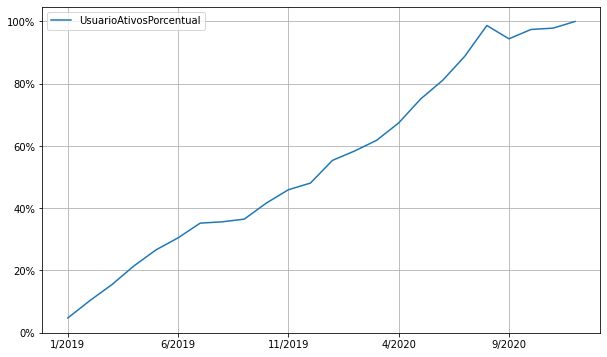

In [ ]:
#Printing information
fig, ax = plt.subplots(figsize=(10,6))
ax.yaxis.set_major_formatter(PercentFormatter())
bp = activeUser_df.plot(ax=ax,y='UsuarioAtivosPorcentual', kind='line', grid=True)



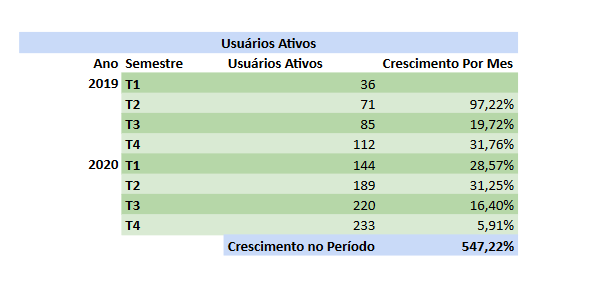
---
O Número de Usuários ativos também cresceu de maneira consistente, de 36 no primeiro trimestre de 2019 para 233 no quarto trimestre de 2020, um crescimento de 547,22%

---

Como podemos ver o Número de Usuarios Ativos e o número de usuários adquiridos vem crescendo desde o lançamento do aplicativo. 
Mas será que já chegamos ao **Product Market Fit**? Para isso devemos analisar o **Churn Rate**.





##Churn Rate

Nessa etapa vamos calcular o churn rate sequencialmente e separando por cohort de acordo com a data de aquisição do cliente.

In [ ]:
#Criando os cohorts por data de aquisição dos cliente
cohort_df=user_df.groupby([user_df.MesRegistro.dt.year,user_df.MesRegistro.dt.month]).count()
#Apagando colunas desnecessárias
cohort_df=cohort_df.drop('EstadoCliente',axis=1).drop('MesRegistro',axis=1).drop('MesdeAbandono',axis=1)
#Corrigindo nome da coluna
cohort_df.index.names=['AnoRegistro', 'MesRegistro']
cohort_df=cohort_df.rename({'Cliente': 'NovosClientes'},axis=1)
#Calculando Churn
cohortPercentage_df = cohort_df.pipe(lambda x: (1-x.div(x['NovosClientes'], axis='index')))

#Zerando o Churn onde o Cohort ainda não começou
cols=range(1,24)
cohortPercentage_df[cohortPercentage_df==1]=0
cohortPercentage_df['NovosClientes']=cohort_df["NovosClientes"]




#formatando churn em string
cohortPercentageString_df = cohortPercentage_df.applymap('{:.2%}'.format)
cohortPercentageString_df['NovosClientes']=cohort_df["NovosClientes"]
#Imprimindo df
cohortPercentageString_df



NovosClientes 1/2019 2/2019 3/2019 4/2019  5/2019  \
AnoRegistro MesRegistro                                                      
2019        1                       11  0.00%  0.00%  9.09%  9.09%   9.09%   
            2                       13  0.00%  0.00%  0.00%  7.69%  15.38%   
            3                       13  0.00%  0.00%  0.00%  0.00%   0.00%   
            4                       15  0.00%  0.00%  0.00%  0.00%   0.00%   
            5                       13  0.00%  0.00%  0.00%  0.00%   0.00%   
            6                       11  0.00%  0.00%  0.00%  0.00%   0.00%   
            7                       11  0.00%  0.00%  0.00%  0.00%   0.00%   
            8                        4  0.00%  0.00%  0.00%  0.00%   0.00%   
            9                        8  0.00%  0.00%  0.00%  0.00%   0.00%   
            10                      15  0.00%  0.00%  0.00%  0.00%   0.00%   
            11                      13  0.00%  0.00%  0.00%  0.00%   0.00%   
            12                       6  0.00%  0.00%  0.00%  0.00%   0.00%   
2020        1                       21  0.00%  0.00%  0.00%  0.00%   0.00%   
            2                       11  0.00%  0.00%  0.00%  0.00%   0.00%   
            3                       11  0.00%  0.00%  0.00%  0.00%   0.00%   
            4                       16  0.00%  0.00%  0.00%  0.00%   0.00%   
            5                       25  0.00%  0.00%  0.00%  0.00%   0.00%   
            6                       22  0.00%  0.00%  0.00%  0.00%   0.00%   
            7                       21  0.00%  0.00%  0.00%  0.00%   0.00%   
            8                       27  0.00%  0.00%  0.00%  0.00%   0.00%   
            9                        5  0.00%  0.00%  0.00%  0.00%   0.00%   
            10                      12  0.00%  0.00%  0.00%  0.00%   0.00%   
            11                      10  0.00%  0.00%  0.00%  0.00%   0.00%   
            12                      16  0.00%  0.00%  0.00%  0.00%   0.00%   

                         6/2019  7/2019  8/2019  9/2019  ...  3/2020  4/2020  \
AnoRegistro MesRegistro                                  ...                   
2019        1             9.09%   9.09%  18.18%  27.27%  ...  27.27%  27.27%   
            2            23.08%  23.08%  23.08%  23.08%  ...  38.46%  38.46%   
            3             0.00%   0.00%   0.00%   7.69%  ...  23.08%  23.08%   
            4             6.67%   6.67%  13.33%  20.00%  ...  40.00%  53.33%   
            5             0.00%   0.00%   7.69%  15.38%  ...  30.77%  30.77%   
            6             0.00%   0.00%   0.00%   9.09%  ...  27.27%  27.27%   
            7             0.00%   0.00%   0.00%   0.00%  ...  27.27%  27.27%   
            8             0.00%   0.00%   0.00%  25.00%  ...  25.00%  25.00%   
            9             0.00%   0.00%   0.00%   0.00%  ...  25.00%  25.00%   
            10            0.00%   0.00%   0.00%   0.00%  ...   6.67%   6.67%   
            11            0.00%   0.00%   0.00%   0.00%  ...   0.00%   7.69%   
            12            0.00%   0.00%   0.00%   0.00%  ...   0.00%   0.00%   
2020        1             0.00%   0.00%   0.00%   0.00%  ...   0.00%   0.00%   
            2             0.00%   0.00%   0.00%   0.00%  ...   9.09%   9.09%   
            3             0.00%   0.00%   0.00%   0.00%  ...   0.00%   0.00%   
            4             0.00%   0.00%   0.00%   0.00%  ...   0.00%   0.00%   
            5             0.00%   0.00%   0.00%   0.00%  ...   0.00%   0.00%   
            6             0.00%   0.00%   0.00%   0.00%  ...   0.00%   0.00%   
            7             0.00%   0.00%   0.00%   0.00%  ...   0.00%   0.00%   
            8             0.00%   0.00%   0.00%   0.00%  ...   0.00%   0.00%   
            9             0.00%   0.00%   0.00%   0.00%  ...   0.00%   0.00%   
            10            0.00%   0.00%   0.00%   0.00%  ...   0.00%   0.00%   
            11            0.00%   0.00%   0.00%   0.00%  ...   0.00%   0.00%

## Análise do Churn Rate

Para facilitar a visualização, esses dados foram trabalhados no excel





In [ ]:
# Salvando arquivo excel
cohortPercentage_df.to_excel('/content/gdrive/MyDrive/Análise de Retenção/cohortPercentage.xlsx')

## Churn Rate por Cohort

Separando as informações dos clintes em Cohorts por data de aquisição

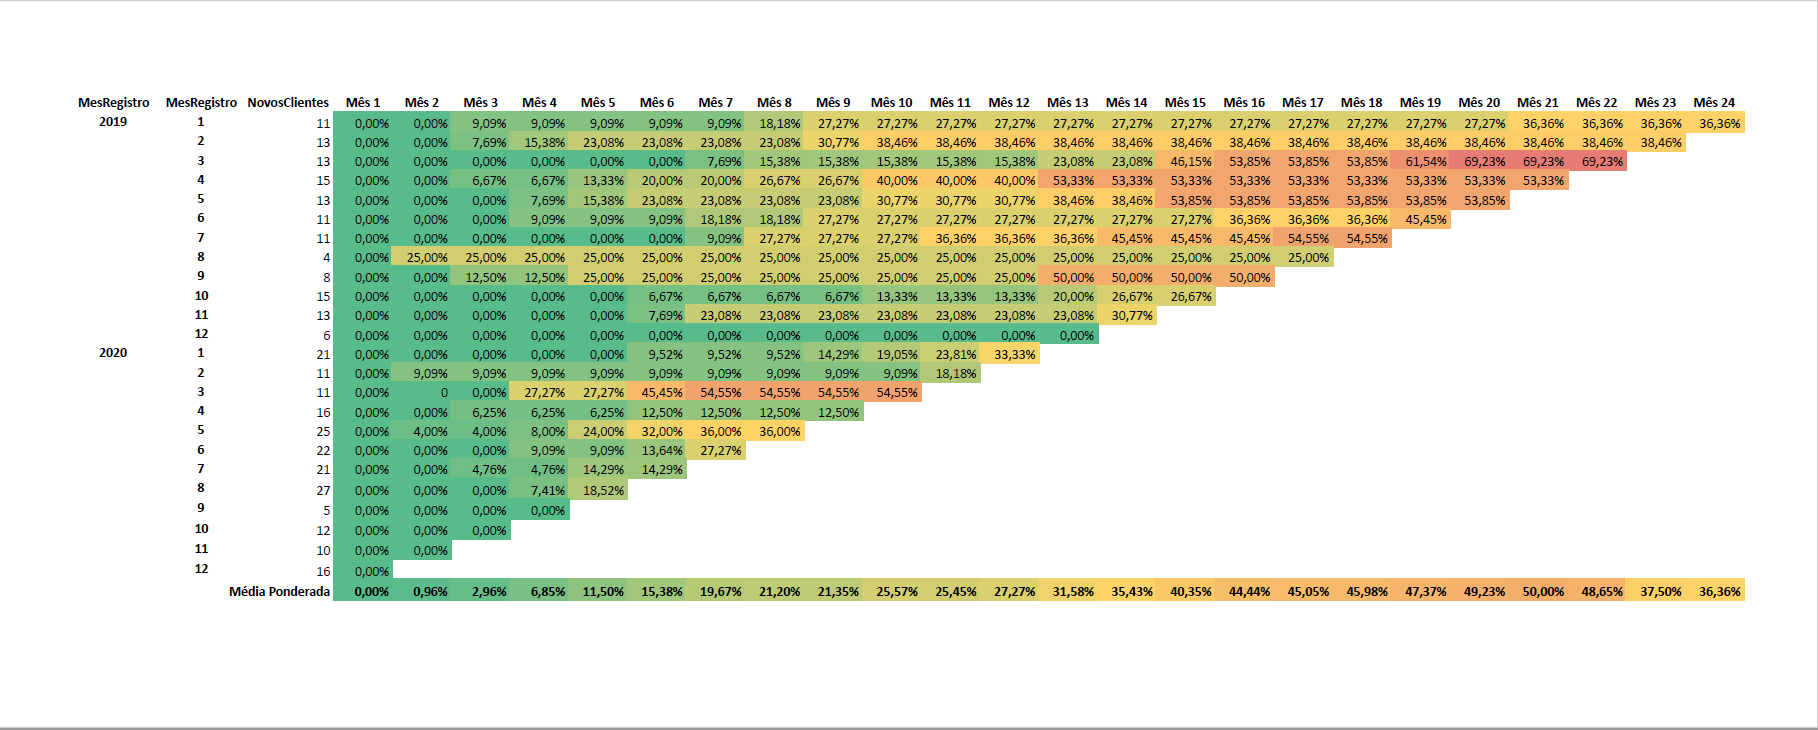

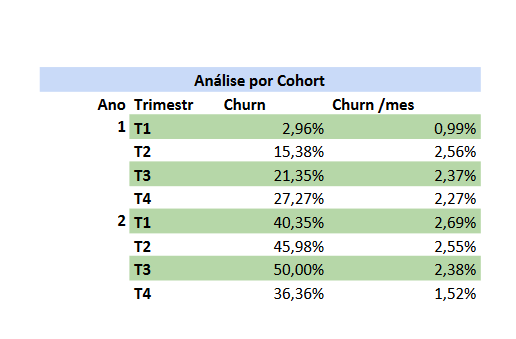

De maneira geral temos Churn Rates baixos, abaixo de 3% ao mês. No entanto temos alguns dados preocupantes.
Muitos dos cohort mais antigos tem churns elevados, acima de 45% no meses finais. O que pode indicar baixo valor no longo prazo do produto oferecido.

## Churn Rate Linear



---

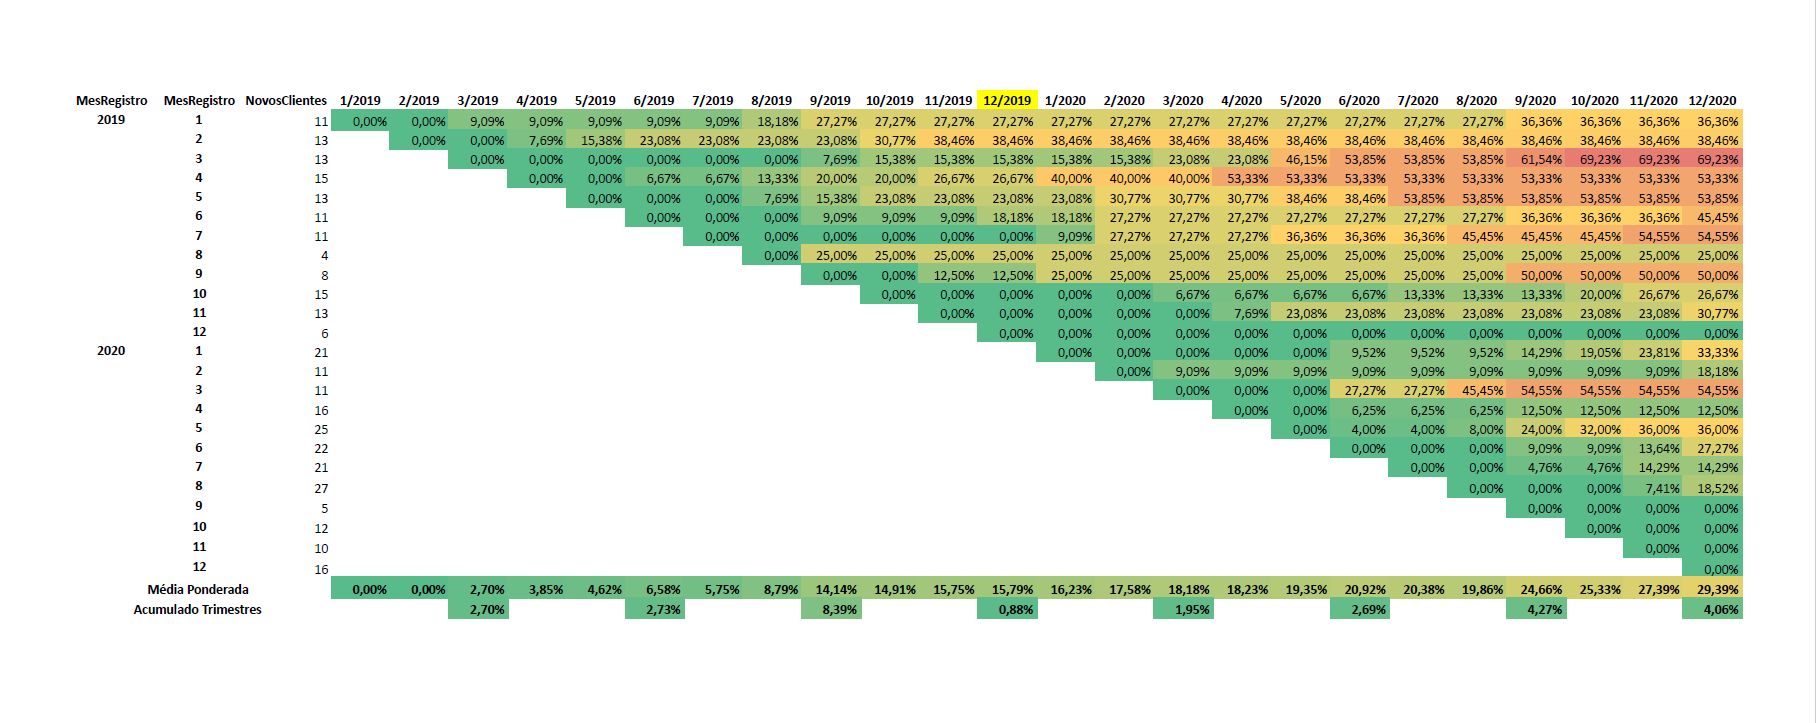

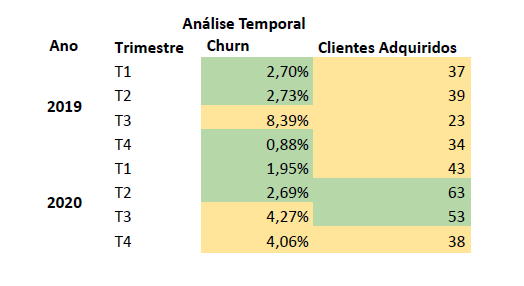

---


*   O Churn acumulado abaixo de 30% mostra que nosso produto tem valor para maior partes dos nossos usuários.
*  Os últimos dois trimestres tiverem Churn elevado, mas também tiveram um elevado número de clientes adquiridos, o que pode indicar uma aquisição de baixa qualidade.

---





# Considerações Finais

Acredito que chegamos ao **Product Market Fit** e devemos investir pesado em Marketing e expansão do número clientes pelas seguintes razões:

*   Churn temporal satisfátorio: abaixo de 3% por trimestre;
*   Churn após um ano de uso satisfatório: 27,7%
*   Crescimento consistente de usuários ativos: 547% em dois anos


Pontos de Atenção

*   Churn elevado para cohorts antigos
*   Churn elevado nos trimestres com alta aquisição de clientes.

Plano de Ação

> Investir consistentemente em marketing com objetivo de adquirir leads qualificados, aprendendo com erros passados.


> Investigar dores de usuários mais antigos (>15 meses) e investir na melhoria do produto.








